## Scraping Spotify daily top 200 streaming songs
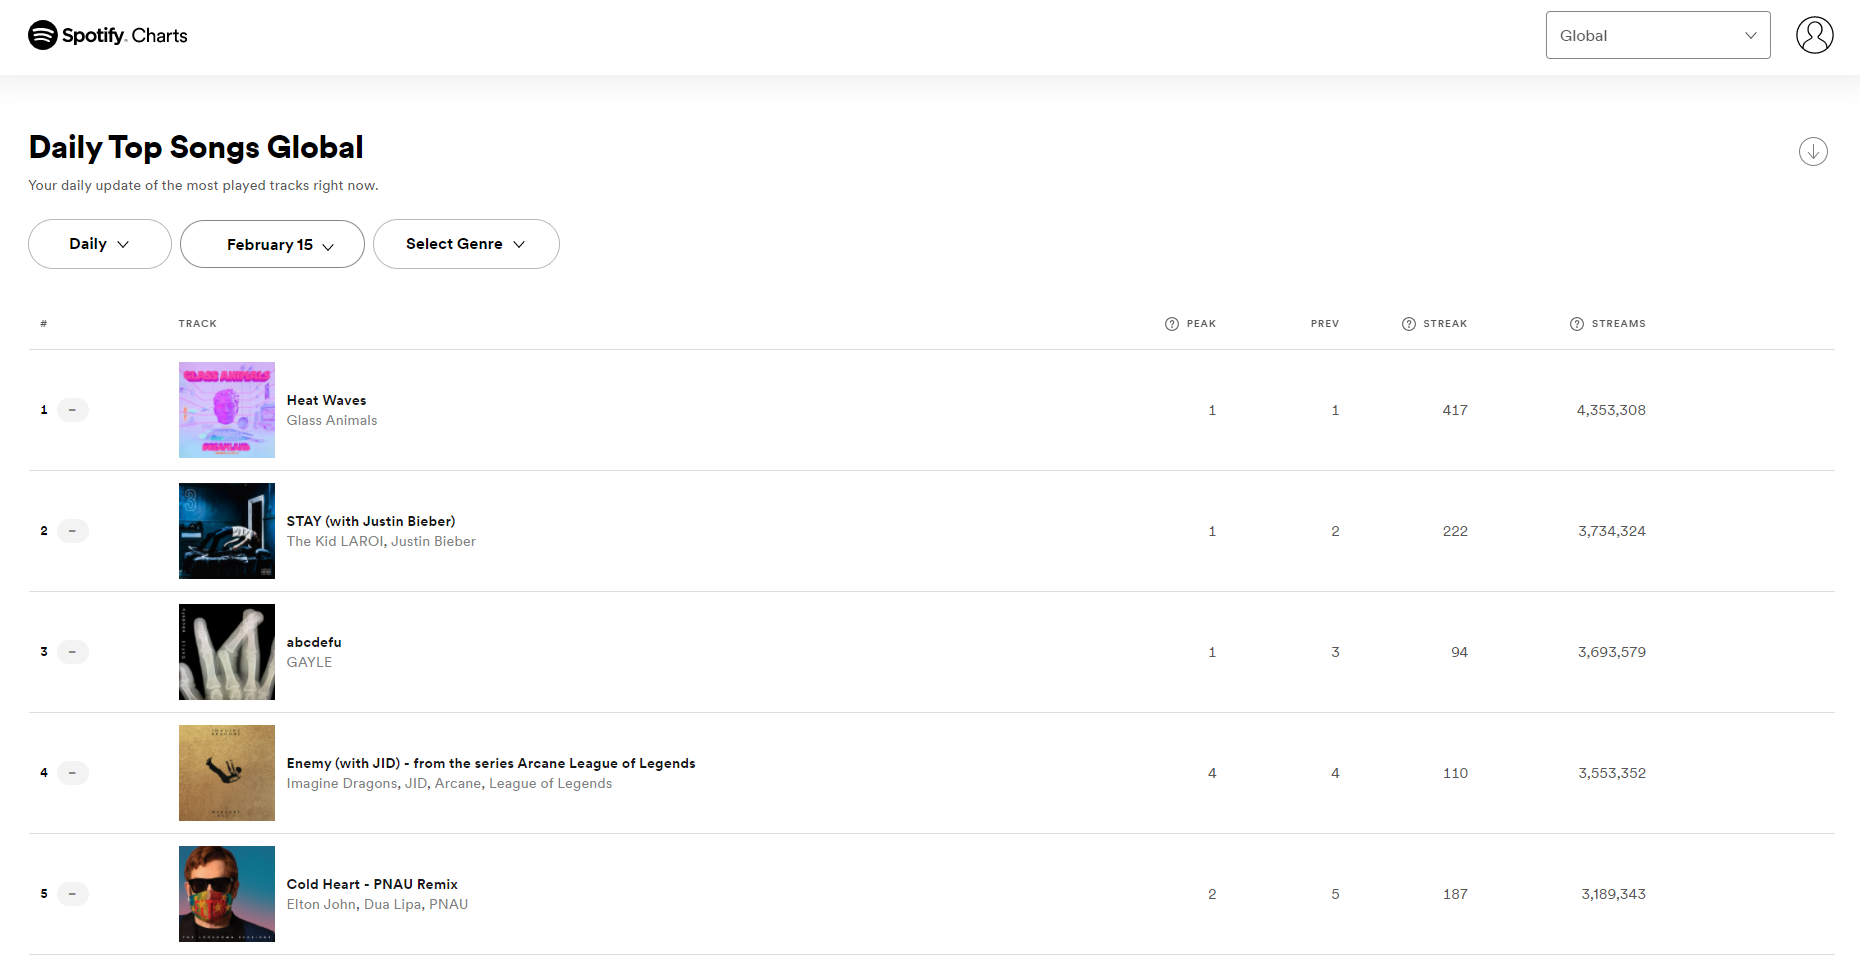

In [2]:
# Import necessary libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
# Check robots.txt first if it is legal to scrape a certain webpage

In [3]:
# Define 'headers'
# http://www.useragentstring.com/
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36'}

In [4]:
# Start with scrape from the chart for one day
data = requests.get('https://spotifycharts.com/regional/global/daily/2022-02-15',headers=headers)
soup1 = BeautifulSoup(data.text, 'html.parser')

In [191]:
# Start with select the first line
rank = soup1.select_one('#content > div > div > div > span > table > tbody > tr:nth-child(1) > td.chart-table-position')

In [192]:
rank.get_text()

'1'

In [194]:
title = soup1.select_one('#content > div > div > div > span > table > tbody > tr:nth-child(1) > td.chart-table-track > strong')

In [195]:
title.get_text()

'Heat Waves'

In [196]:
artist = soup1.select_one('#content > div > div > div > span > table > tbody > tr:nth-child(1) > td.chart-table-track > span')

In [197]:
artist.get_text()

'by Glass Animals'

In [198]:
stream = soup1.select_one('#content > div > div > div > span > table > tbody > tr:nth-child(1) > td.chart-table-streams')

In [199]:
stream.get_text()

'4,353,308'

In [200]:
date = soup1.select_one('#content > div > div > div > span > div.wrapper > div > div > div > div:nth-child(3) > div')

In [201]:
date.get_text()

'02/15/2022'

In [157]:
# Select the chart information for one day
list1 = soup.select('#content > div > div > div > span > table > tbody > tr')

In [167]:
# Make an empty list first
song_ranking_list=[]

In [168]:
# Make a dictionary with selected text
for result in list1:
  date = 
  rank = result.select_one('td.chart-table-position').text[0:3].strip()
  title = result.select_one('td.chart-table-track > strong').text.strip()
  artist = result.select_one('td.chart-table-track > span').text.strip()
  stream = result.select_one('td.chart-table-streams').text.strip()

  song_ranking_list.append({'rank' : rank, 'title' : title, 'artist' : artist, 'stream' : stream})

In [170]:
# Trasform dictionary into dataframe
df1 = pd.DataFrame(song_ranking_list)
df1

,rank,title,artist,stream
0,1,Heat Waves,by Glass Animals,"4,353,308"
1,2,STAY (with Justin Bieber),by The Kid LAROI,"3,734,324"
2,3,abcdefu,by GAYLE,"3,693,579"
3,4,Enemy (with JID) - from the series Arcane Leag...,by Imagine Dragons,"3,553,352"
4,5,Cold Heart - PNAU Remix,"by Elton John, Dua Lipa","3,189,343"
...,...,...,...,...
195,196,Señorita,"by Shawn Mendes, Camila Cabello","783,531"
196,197,Do I Wanna Know?,by Arctic Monkeys,"779,319"
197,198,Bored,by Billie Eilish,"778,953"
198,199,I WANNA BE YOUR SLAVE,by Måneskin,"777,108"


In [177]:
# Create a date index for date to scrape from a certain range of the date
import pandas
import time
import datetime
all_dates = pandas.date_range(start='2020-10-15', end='2022-2-15')
all_dates

DatetimeIndex(['2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18',
               '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22',
               '2020-10-23', '2020-10-24',
               ...
               '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15'],
              dtype='datetime64[ns]', length=489, freq='D')

In [183]:
len(all_dates)

489

In [179]:
# Create URL list with the date index
urls=[]
for date in all_dates : 
    urls.append('https://spotifycharts.com/regional/global/daily/' + str(date)[:10])

In [181]:
# HTML data from the URLs
soup = []

for url in urls :
    data = requests.get(url, headers=headers)
    soup.append(BeautifulSoup(data.text, 'html.parser'))

In [219]:
len(soup) # Chart data of 489 days

489

In [220]:
# Select the chart information
list = []

for i in range(0, 489):
        soup_i = soup[i]
        list.append(soup_i.select('#content > div > div > div > span > table > tbody > tr'))

In [221]:
len(list)

489

In [222]:
song_ranking_list_all=[]

In [223]:
# Make a dictionary with selected text
for i in range(0, 489):
    list_i = list[i]
    for result in list_i:
        rank = result.select_one('td.chart-table-position').text[0:3].strip()
        title = result.select_one('td.chart-table-track > strong').text.strip()
        artist = result.select_one('td.chart-table-track > span').text.strip()
        stream = result.select_one('td.chart-table-streams').text.strip()

        song_ranking_list_all.append({'rank' : rank, 'title' : title, 'artist' : artist, 'stream' : stream})

In [224]:
len(song_ranking_list_all) # 200 ranks * 489 days

97800

In [226]:
# Trasform dictionary into dataframe
df = pd.DataFrame(song_ranking_list_all)
df.head()

,rank,title,artist,stream
0,1,Mood (feat. iann dior),by 24kGoldn,"5,165,255"
1,2,"Lemonade (feat. Gunna, Don Toliver & NAV)",by Internet Money,"4,362,794"
2,3,WAP (feat. Megan Thee Stallion),by Cardi B,"3,996,566"
3,4,Dynamite,by BTS,"3,759,045"
4,5,Hawái,by Maluma,"3,671,227"


In [227]:
df.tail()

,rank,title,artist,stream
97795,196,Señorita,"by Shawn Mendes, Camila Cabello","783,531"
97796,197,Do I Wanna Know?,by Arctic Monkeys,"779,319"
97797,198,Bored,by Billie Eilish,"778,953"
97798,199,I WANNA BE YOUR SLAVE,by Måneskin,"777,108"
97799,200,Memories,by Maroon 5,"776,127"


In [258]:
# Add the column of dates
import numpy as np

dates = []
for date in all_dates : 
    dates.append(np.repeat(str(date)[:10], 200))

In [259]:
dates = np.concatenate(dates) #rbind

In [260]:
len(dates)

97800

In [261]:
dates = pd.DataFrame(dates, columns=['date'])

In [262]:
dates

,date
0,2020-10-15
1,2020-10-15
2,2020-10-15
3,2020-10-15
4,2020-10-15
...,...
97795,2022-02-15
97796,2022-02-15
97797,2022-02-15
97798,2022-02-15


In [263]:
df = pd.concat([dates, df], axis=1) # cbind

In [264]:
df

,date,rank,title,artist,stream
0,2020-10-15,1,Mood (feat. iann dior),by 24kGoldn,"5,165,255"
1,2020-10-15,2,"Lemonade (feat. Gunna, Don Toliver & NAV)",by Internet Money,"4,362,794"
2,2020-10-15,3,WAP (feat. Megan Thee Stallion),by Cardi B,"3,996,566"
3,2020-10-15,4,Dynamite,by BTS,"3,759,045"
4,2020-10-15,5,Hawái,by Maluma,"3,671,227"
...,...,...,...,...,...
97795,2022-02-15,196,Señorita,"by Shawn Mendes, Camila Cabello","783,531"
97796,2022-02-15,197,Do I Wanna Know?,by Arctic Monkeys,"779,319"
97797,2022-02-15,198,Bored,by Billie Eilish,"778,953"
97798,2022-02-15,199,I WANNA BE YOUR SLAVE,by Måneskin,"777,108"


In [265]:
# Export the dataframe as a csv file
df.to_csv(r'C:\Users\ylee5\Desktop\UCLA\2021_4_STAT404\Presentation\spotifycharts.csv')